# Project Team Id: PTID-CDS-JUN-24-1940

# Project Id: PRCP- 1001- RiceLeaf disease detection
# PROJECT NAME : Rice Leaf Disease using CNN


# Business Case

# Importing Library

In [56]:
import tensorflow
import keras
from tensorflow.keras import models,layers
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

## Import data into tensorflow dataset object

In [57]:
data = tensorflow.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\podem\Projects_Datamites\Rice_Leaf\Data Set",
    seed=123,
    shuffle=True,
    image_size=(423,423),
    batch_size= 32
)

Found 119 files belonging to 3 classes.


In [58]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 423, 423, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [59]:
class_names = data.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

 Each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels



In [60]:
for image_batch, labels_batch in data.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 423, 423, 3)
[0 1 2 2 1 0 1 0 1 1 1 2 0 1 0 1 1 1 0 0 2 2 1 2 1 1 1 2 0 2 0 0]


## Visualize some of the images from our dataset


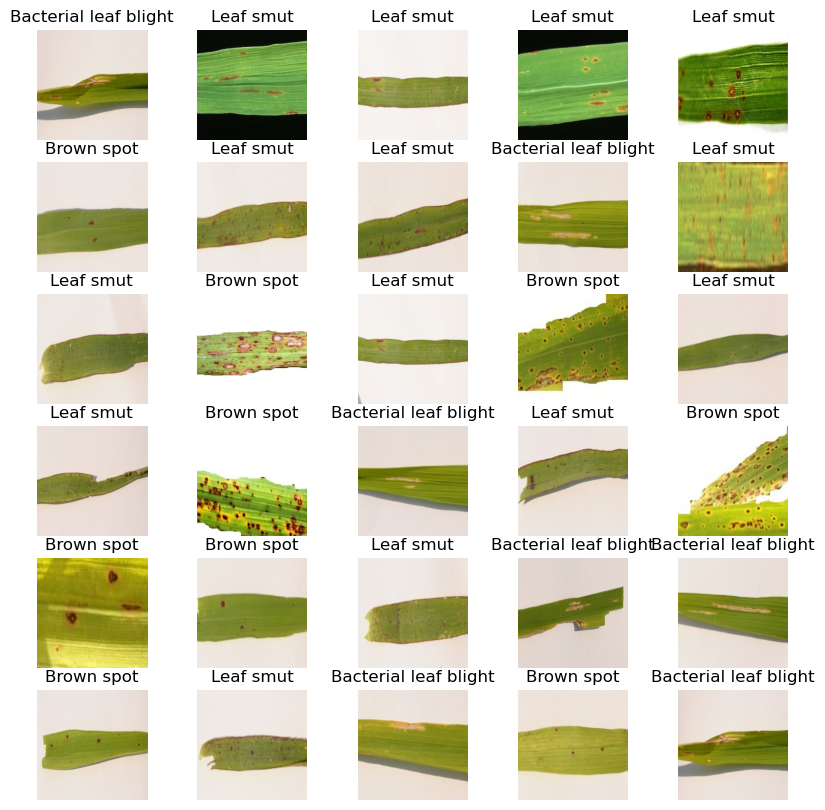

In [61]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in data.take(1):
    for i in range(30):
        plt.subplot(6,5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.xticks(rotation=25)
        plt.axis("off")

Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

1.Training: Dataset to be used while training  
2.Validation: Dataset to be tested against while training  
3.Test: Dataset to be tested against after we trained a model


In [62]:
len(data)

4

In [63]:
train_size = 0.8
len(data)*train_size


3.2

In [64]:
train_ds = data.take(3)
len(train_ds)

3

In [65]:
test_ds = data.skip(3)
len(test_ds)

1

In [66]:
val_size=0.1
len(data)*val_size

0.4

In [67]:
val_ds = train_ds.take(1)
len(val_ds)

1

### Cache, Shuffle, and Prefetch the Dataset


In [68]:
#Caching: Keeps data in memory to speed up access.
#Shuffle: Randomizes the order of data to ensure diverse training examples and prevent overfitting(1000) to the order.
#Prefetching: Loads the next batch of data while the model is training on the current batch to avoid delays.
#buffer_size: the number of elements from which the dataset will randomly sample
#buffer_size=tf.data.AUTOTUNE: This parameter automatically tunes the buffer size based on the system and dataset characteristics, aiming to optimize the performance of data loading and preprocessing.

In [69]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tensorflow.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tensorflow.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tensorflow.data.AUTOTUNE)

# Building the Model

### Creating a Layer for Resizing and Normalization


In [70]:
resize_and_rescale = tensorflow.keras.Sequential([
  layers.Resizing(423,423),
  layers.Rescaling(1/255),
])


## Data Augmentation



### Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.


In [71]:
data_augmentation = tensorflow.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


### Applying Data Augmentation to Train Dataset


In [72]:
train_ds = train_ds.map(
    lambda x,y: (data_augmentation(x, training=True),y)).prefetch(buffer_size=tensorflow.data.AUTOTUNE)

## Model Architecture


In [73]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(32, 423, 423, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])
model.build(input_shape=(32,423,423,3))

In [74]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)            │ (32, 423, 423, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (32, 421, 421, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (32, 210, 210, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (32, 208, 208, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (32, 104, 104, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (32, 102, 102, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (32, 51, 51, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (32, 49, 49, 16)            │           9,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (32, 24, 24, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (32, 22, 22, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (32, 11, 11, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (32, 9, 9, 64)              │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (32, 4, 4, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (32, 2, 2, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,971 (507.70 KB)

 Trainable params: 129,971 (507.70 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model


In [75]:
model.compile(loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='rmsprop', metrics=['accuracy'])

In [76]:
hist =model.fit(train_ds,
               batch_size=32,
               validation_data=val_ds,
               epochs=50,
               verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.3138 - loss: 1.1089 - val_accuracy: 0.4375 - val_loss: 1.0961
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.3711 - loss: 1.0989 - val_accuracy: 0.2812 - val_loss: 1.0989
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.2747 - loss: 1.0988 - val_accuracy: 0.2812 - val_loss: 1.0979
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.2930 - loss: 1.0982 - val_accuracy: 0.2812 - val_loss: 1.0975
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.2930 - loss: 1.0980 - val_accuracy: 0.2812 - val_loss: 1.0964
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3711 - loss: 1.0976 - val_accuracy: 0.5000 - val_loss: 1.0942
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.3711 - loss: 1.0962 - val_accuracy: 0.2812 - val_loss: 1.0922
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3802 - loss: 1.0927 - val_accuracy: 0.4375 - val_loss: 1.0956
Epoch 9/

In [77]:
scores=model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7826 - loss: 0.7518


In [78]:
scores

[0.7517566084861755, 0.782608687877655]

## Plotting the Accuracy and Loss Curves


In [79]:
hist

In [80]:
hist.params

{'verbose': 1, 'epochs': 50, 'steps': 3}

In [81]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [82]:
type(hist.history['loss'])

list

In [83]:
len(hist.history['loss'])

50

In [84]:
hist.history['loss'][-5:]# show loss for last 5 epochs


[0.7967860698699951,
 0.7804193496704102,
 0.795783519744873,
 0.9607910513877869,
 0.7734703421592712]

In [85]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']


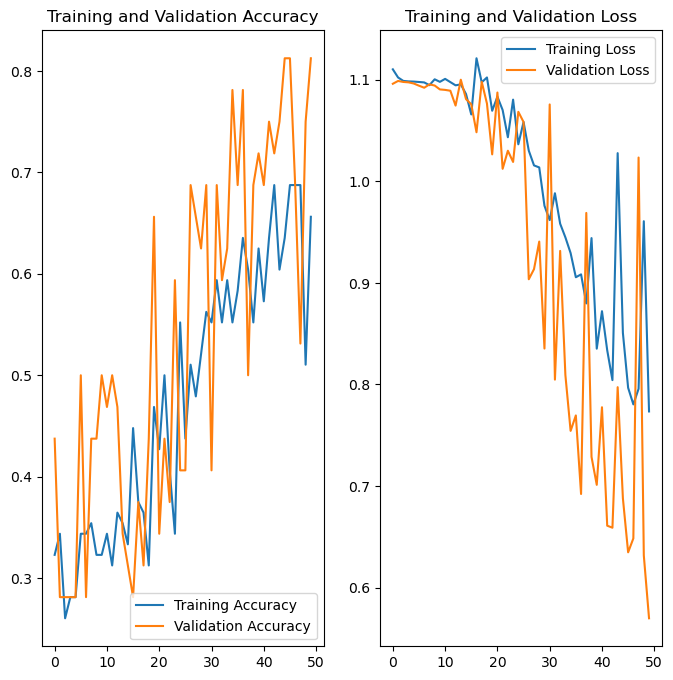

In [86]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Run prediction on a sample image


first image to predict
actual label: Bacterial leaf blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Bacterial leaf blight


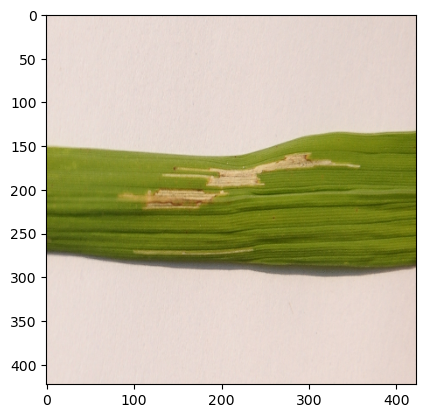

In [87]:
for images_batch, labels_batch in test_ds.take(3):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


### Write a function for inference

In [88]:
def predict(model, img):
    img_array = tensorflow.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tensorflow.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


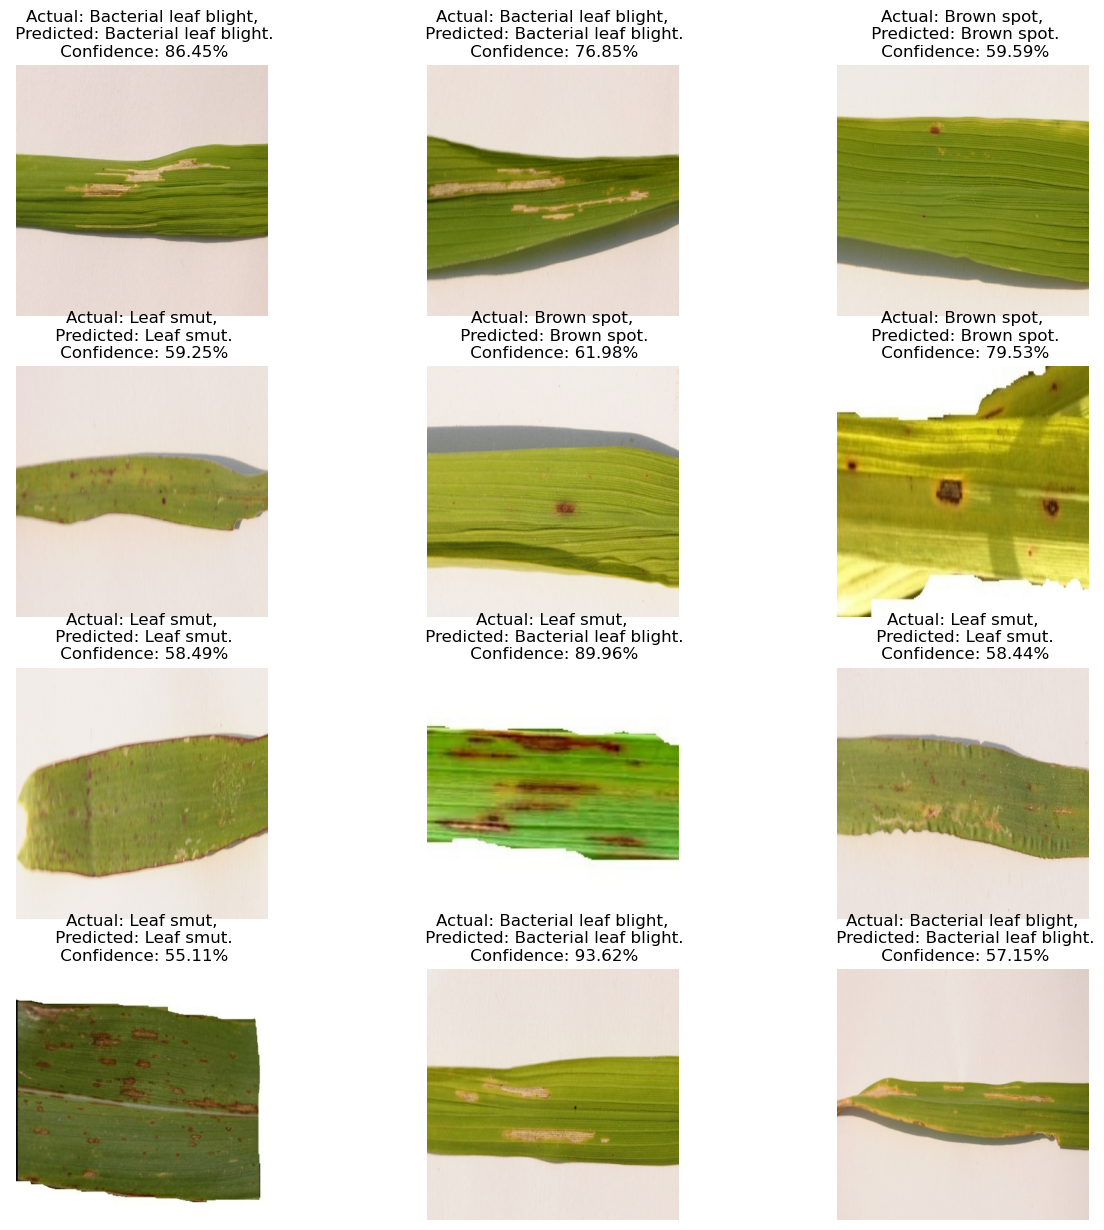

In [89]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


# Conlusion
